In [1]:
import numpy as np
import pandas as pd

import seaborn as sns 
import matplotlib.pyplot as plt

import sklearn.preprocessing as skp
import sklearn.cluster as skc 

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('Country-data.csv')


In [3]:
dataset.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
dataset.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
dataset.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
dataset[dataset.duplicated(keep=False)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [8]:
## Univariate Analysis

## The univariate analysis aims to understand how the values for a single variable are distributed.

## We will conduct a univariate analysis in this analysis by visualizing the data using a boxplot and histogram because most of our data is numerical features.


In [9]:
# Visualize the distribution of each variable 

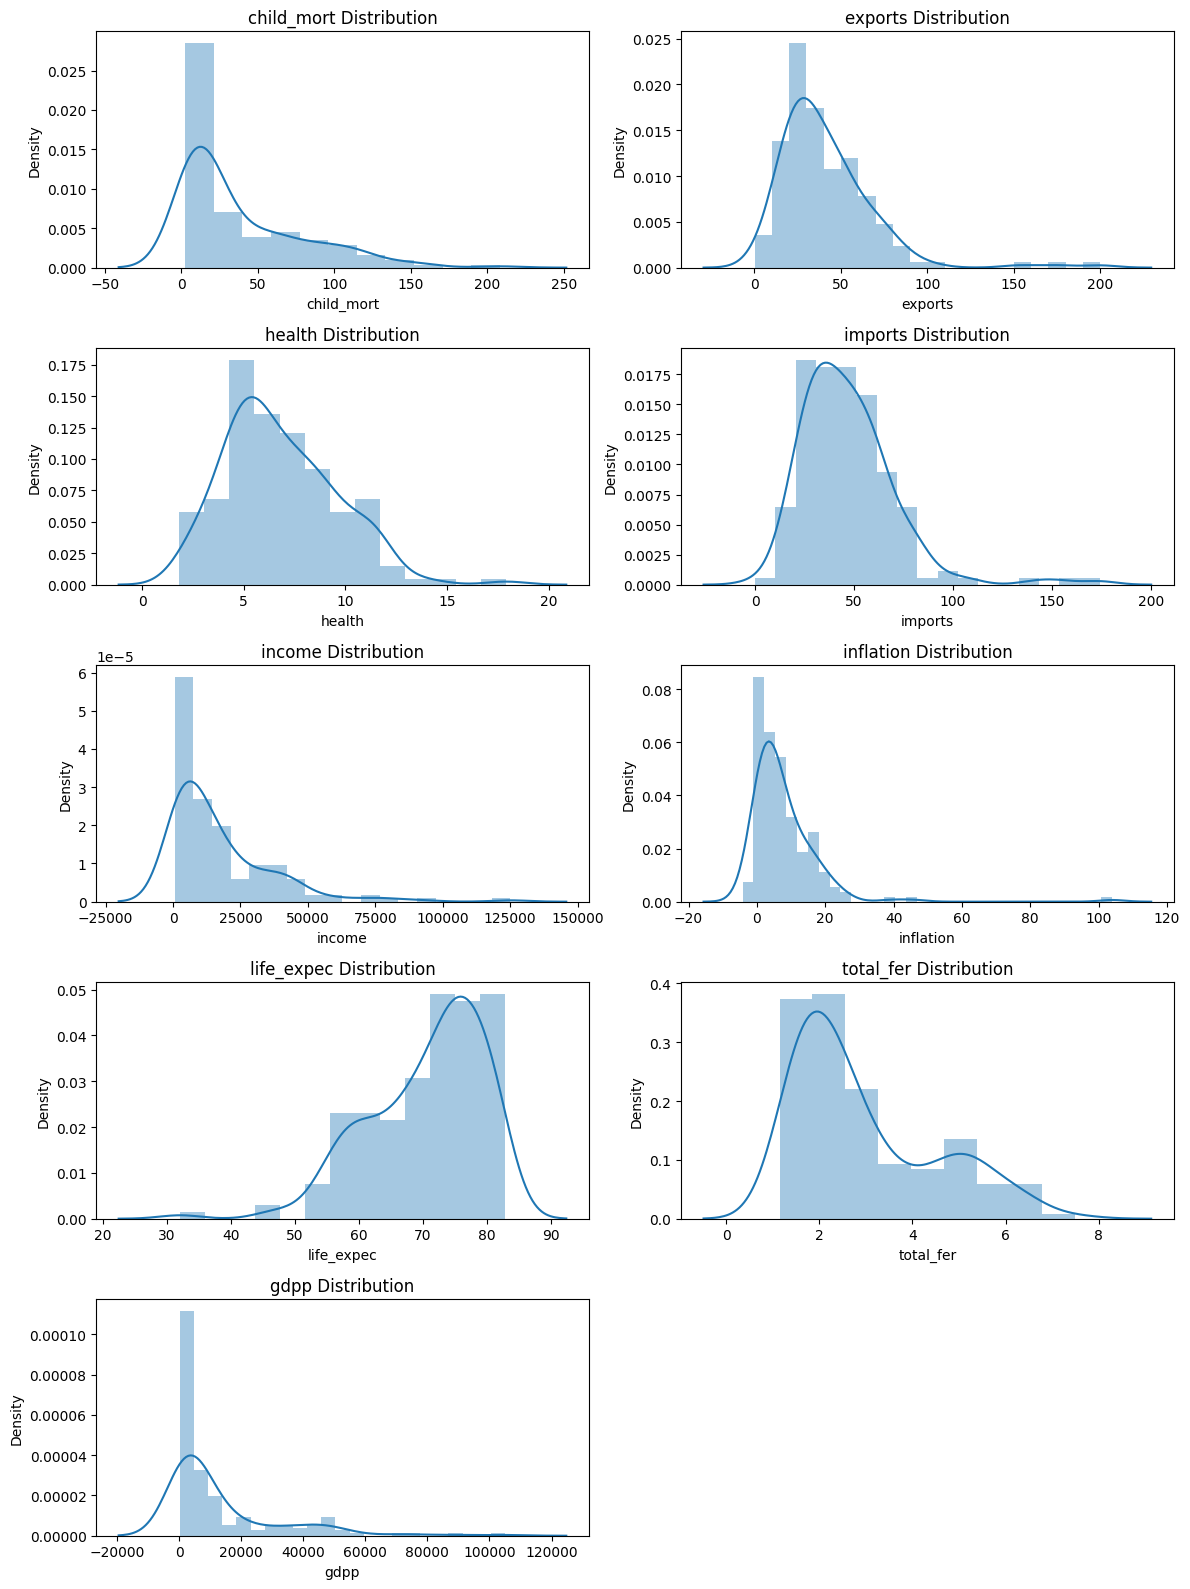

In [10]:
plt.figure(figsize=(12,16))

for i, j in enumerate(dataset.describe().columns):
    plt.subplot(5, 2, i+1)
    sns.distplot(x=dataset[j])
    plt.xlabel(j)
    plt.title('{} Distribution'.format(j))
    plt.tight_layout()

plt.show()

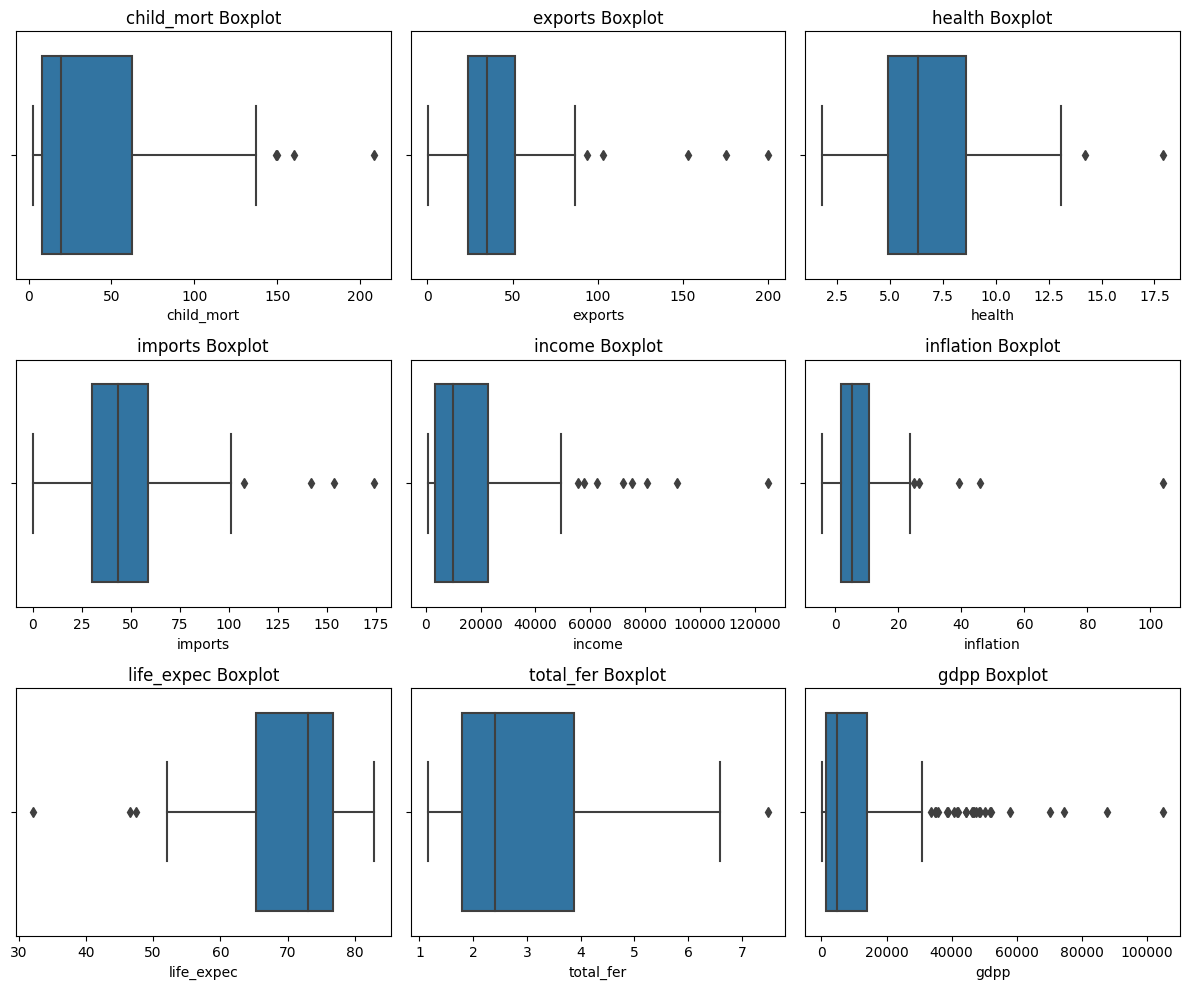

In [11]:
#Boxplot

plt.figure(figsize=(12,10))

for i, j in enumerate(dataset.describe().columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=dataset[j])
    plt.xlabel(j)
    plt.title('{} Boxplot'.format(j))
    plt.tight_layout()

plt.show()

The boxplot shows that the GDP per capita (gdpp) and income are the variables with the most outliers. Therefore, later we must evaluate which nations are qualified for financial aid based on the business case, considering each nation’s economy and level of health.

In [ ]:
## Bivariate analysis is used to analyze two variables to examine their relationship.

## As we can see from the boxplot, the gdpp variable is similar to the income variable. Therefore, it is better to know how these two variables relate in a scatterplot.


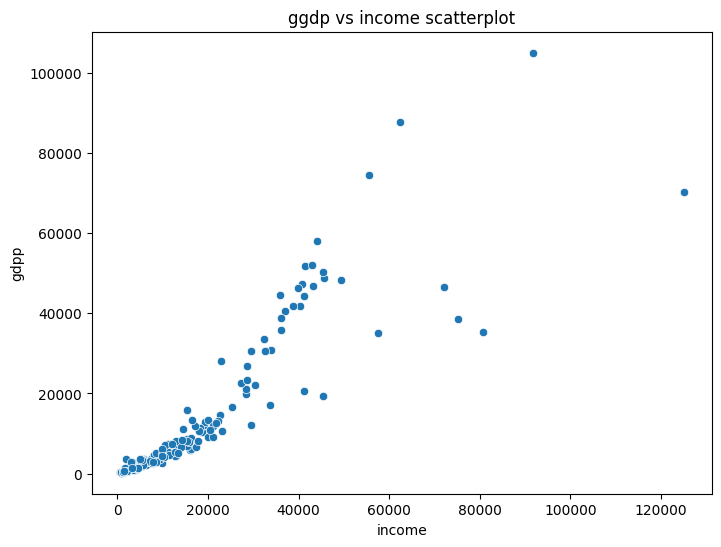

In [12]:
fig = plt.figure(figsize=(8, 6))

sns.scatterplot(x=dataset.income, y=dataset.gdpp)
plt.title('ggdp vs income scatterplot')

plt.savefig('scatter.png')
plt.show()


As we can see from the above scatterplot, these two variables have a strong positive relationship. As income increases, ggdp also increases.

We can also use the .corr() function to show Pearson’s correlation value (as the default method) between the two variables.



In [13]:
print('Correlation between income and gdpp: {}'.format(round(dataset.corr()['income']['gdpp'],3)))

Correlation between income and gdpp: 0.896


Multivariate analysis is used to analyze more than two variables simultaneously. In addition, this analysis will assist us in determining the correlation between all variables in the dataset.

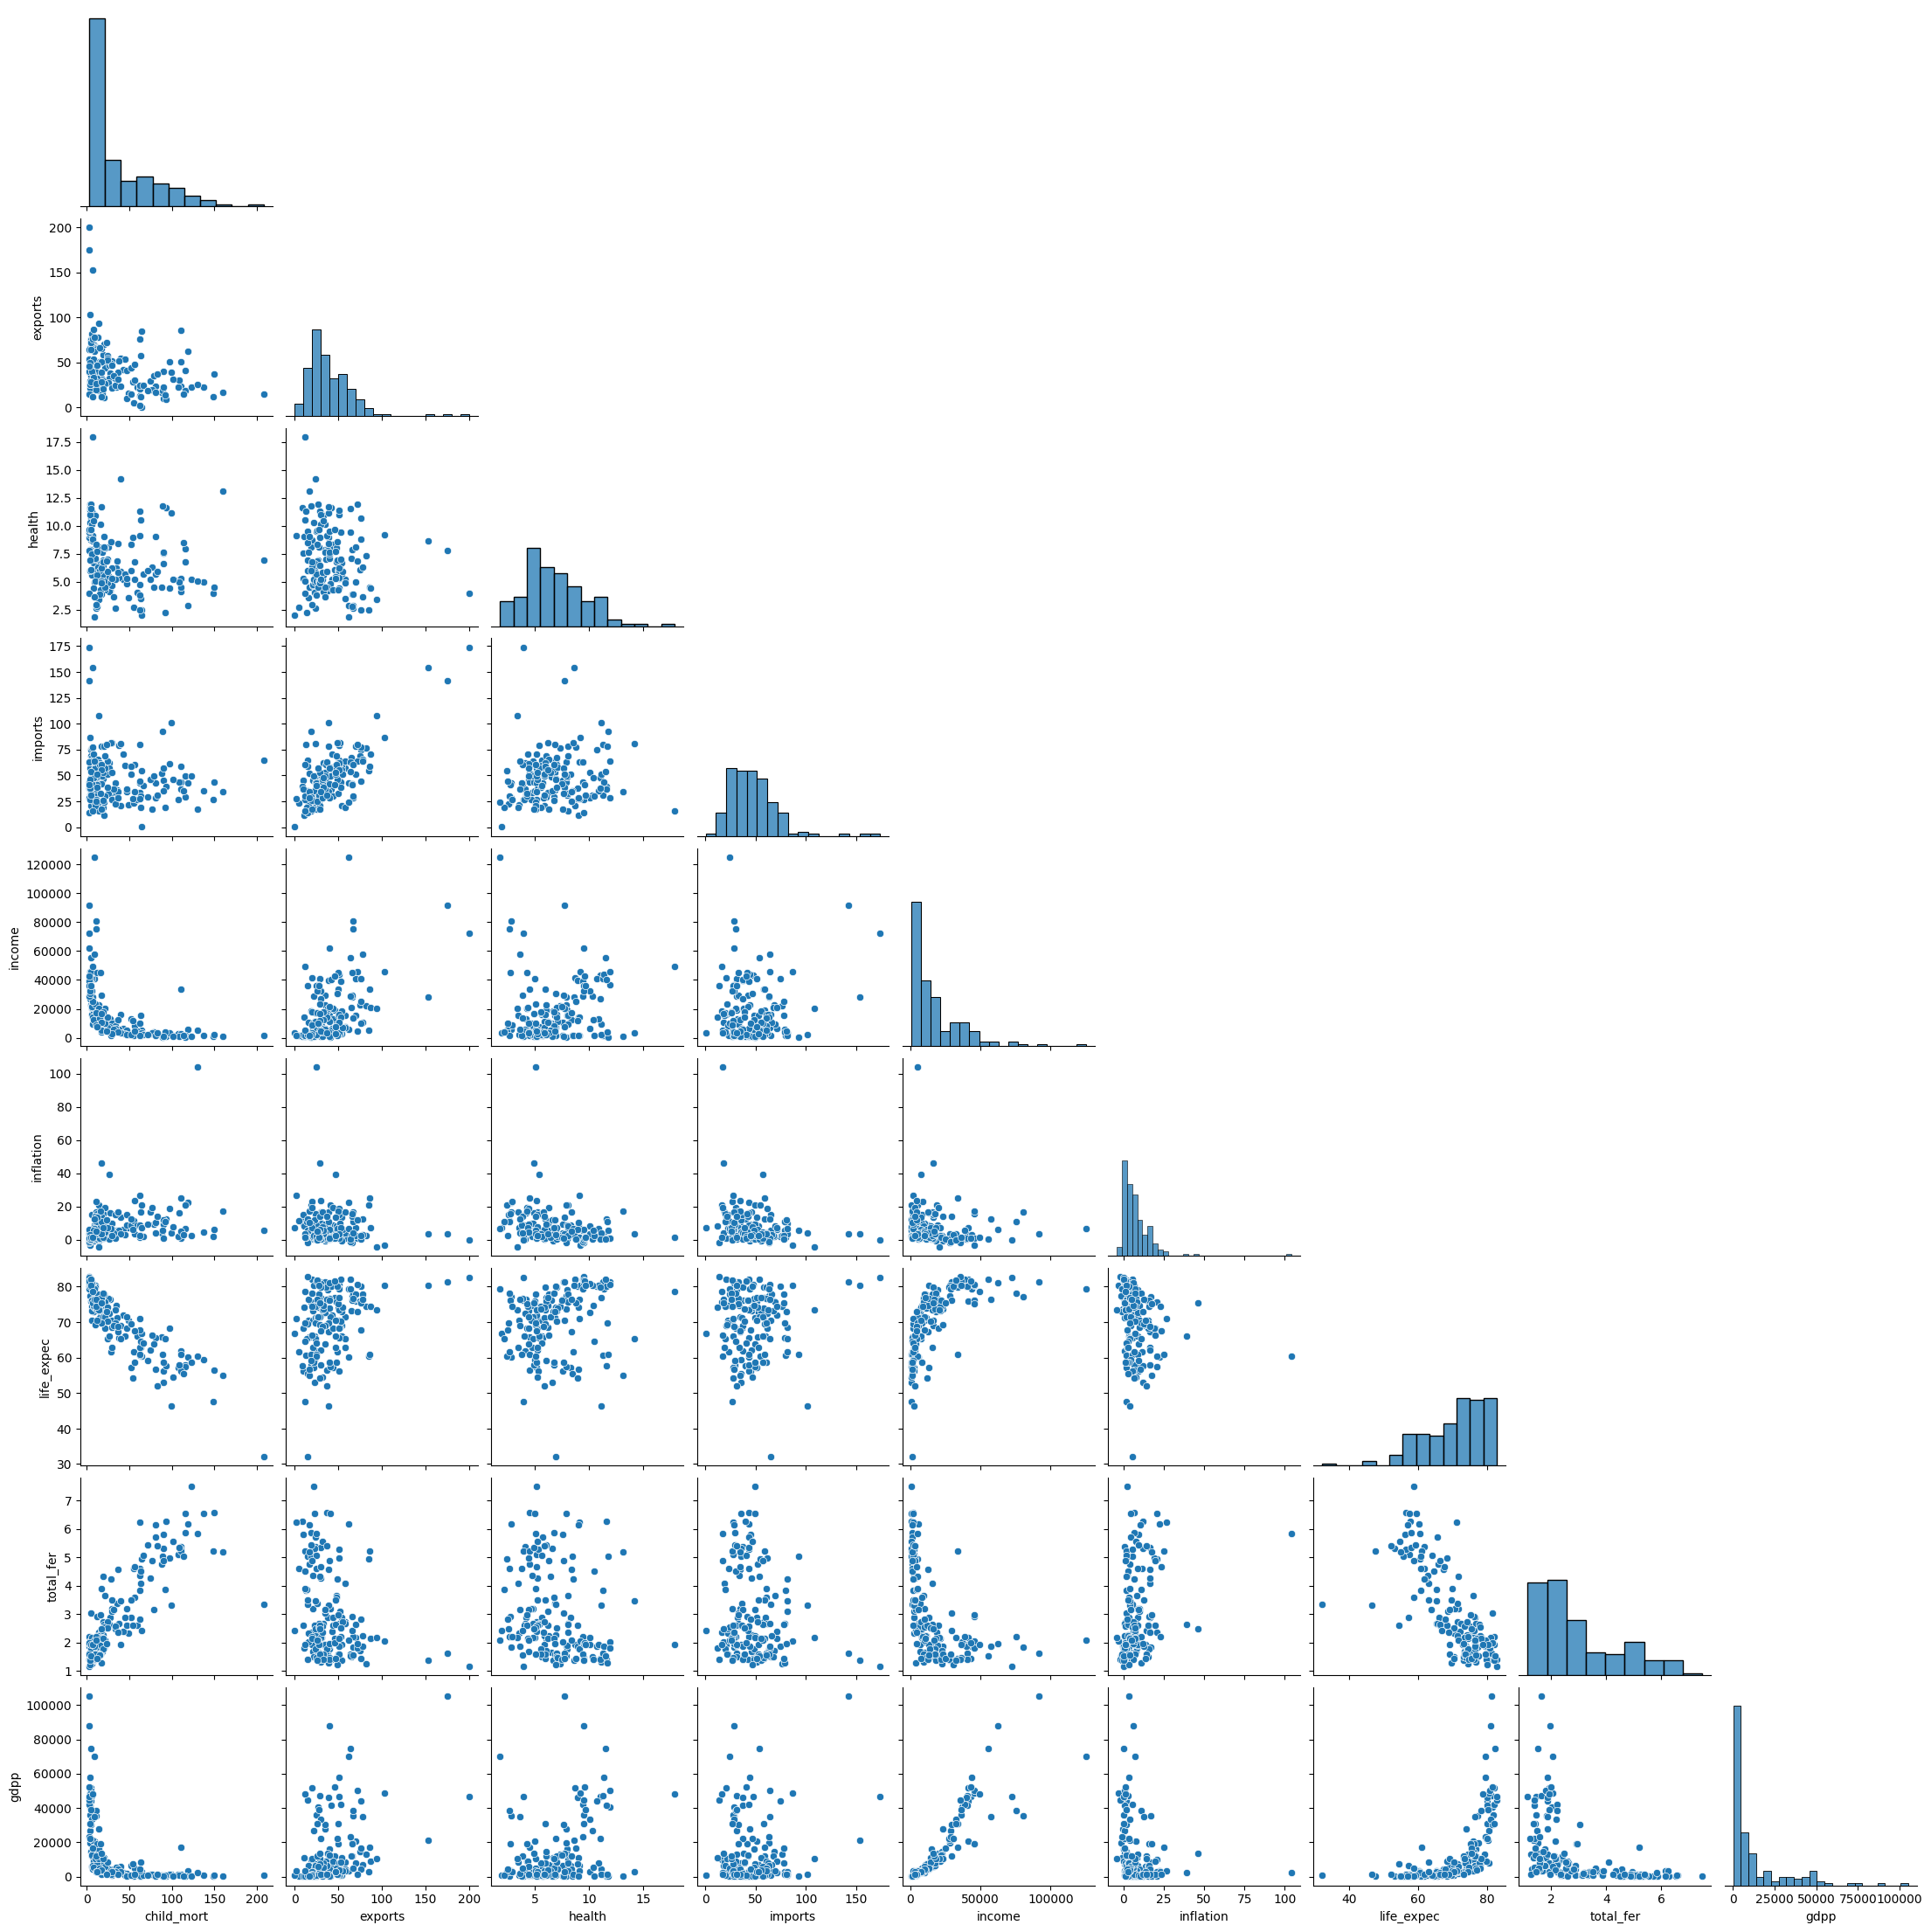

In [14]:
##Pair Plot

pairplot = sns.pairplot(dataset, corner=True)
plt.show(pairplot)

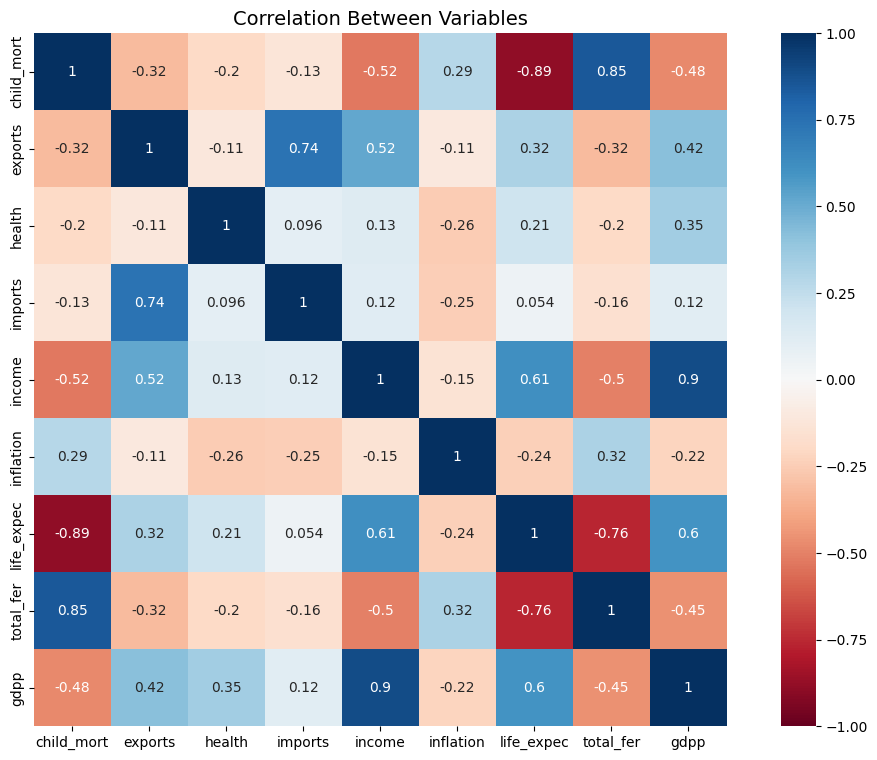

In [16]:
correlation_metrics=dataset.corr()
fig = plt.figure(figsize=(14,9))
sns.heatmap(correlation_metrics, square=True, annot=True, vmax=1, vmin=-1, cmap='RdBu')
plt.title('Correlation Between Variables', size=14)
plt.show()

Correlation is a statistical method for determining whether numerical or categorical variables are related. It’s a way of determining how things are connected.


To determine the best features, we need to review the purpose of this project. This project aims “to categorize countries using socio-economic and health factors to identify which countries need financial aid the most”.

As we can see from the correlation heatmap of our dataset, the income variable has medium correlations with the child_mort, exports, and life_expect. Therefore, for this analysis, we will use the child_mort variable as the feature that will represent the health factor of a country.




In [17]:
## Features Outliers Handling
## Basically reduce the number of countries by median income that way you can get the countries that need financial assistance.
dataset_filter_income = dataset[dataset.income < dataset.income.median()]
dataset_filter_income


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220
12,Bangladesh,49.4,16.0,3.52,21.8,2440,7.14,70.4,2.33,758
...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


Now with only simple filtering above, we can reduce our selection by almost 50 % . After filtering, let’s display the histogram and boxplot of income and child_mort variable.


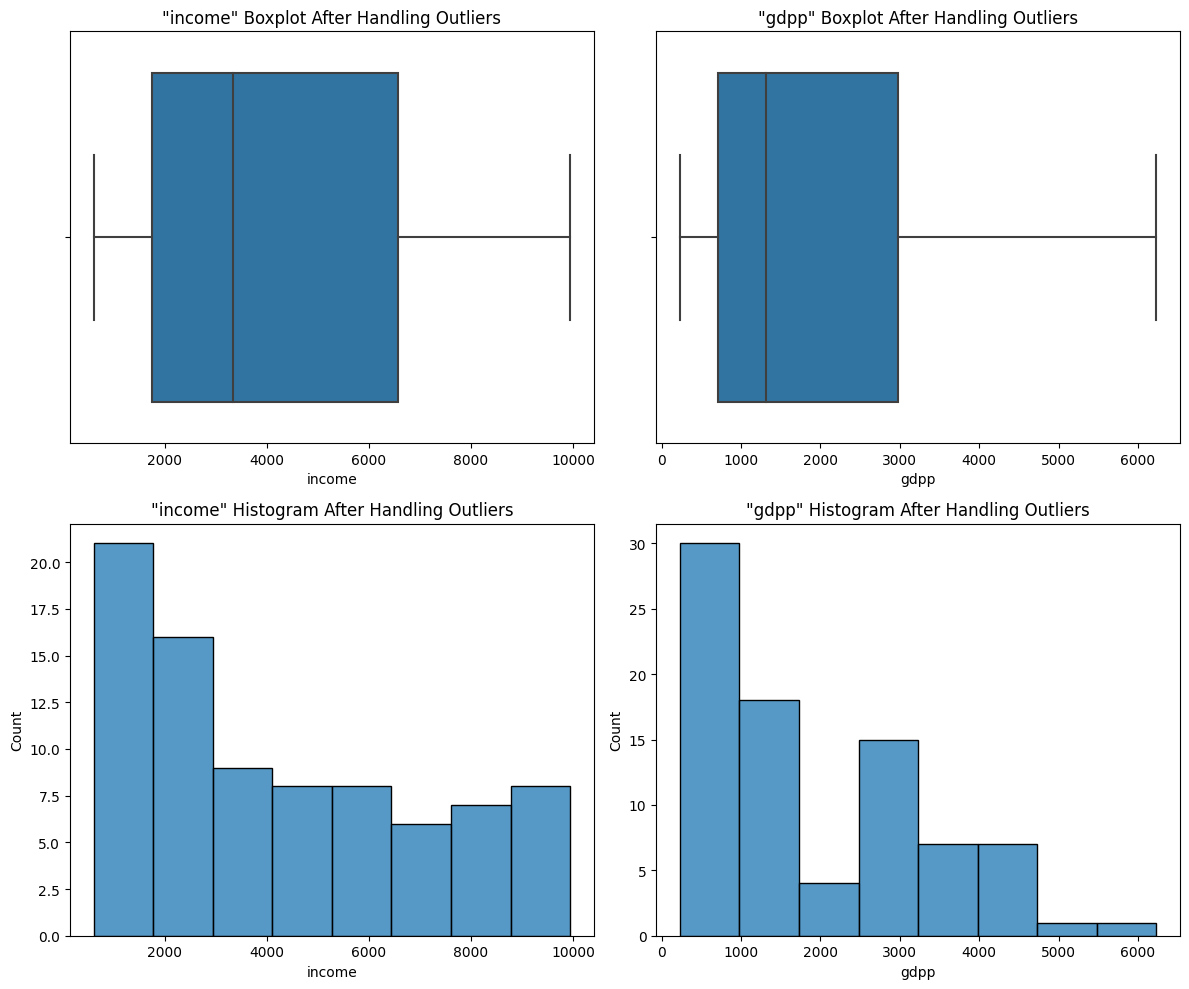

In [19]:
fig = plt.figure(figsize=(12,10))
plt.subplot(2, 2, 1)
sns.boxplot(x=dataset_filter_income["income"])
plt.title('"income" Boxplot After Handling Outliers')
plt.tight_layout()
plt.subplot(2, 2, 2)
sns.boxplot(x=dataset_filter_income["gdpp"])
plt.title('"gdpp" Boxplot After Handling Outliers')
plt.tight_layout()
plt.subplot(2, 2, 3)
sns.histplot(x=dataset_filter_income["income"])
plt.title('"income" Histogram After Handling Outliers')
plt.tight_layout()
plt.subplot(2, 2, 4)
sns.histplot(x=dataset_filter_income["gdpp"])
plt.title('"gdpp" Histogram After Handling Outliers')
plt.tight_layout()
plt.savefig('after_filter.png')
plt.show()


Based on the above charts, we can confidently proceed to the next step for clustering because the charts show no outliers, which indicates our dataset is now cleaner than before.

Before we do the clustering, let’s see our chosen features’ correlation using a scatterplot and .hexbin() function from the matplotlib library.




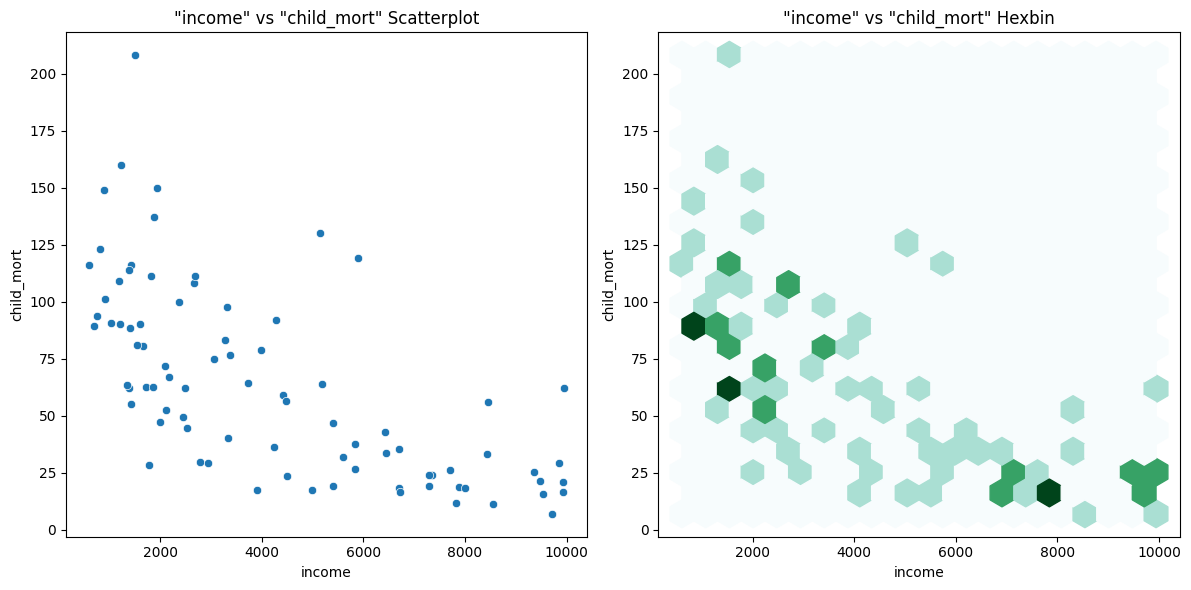

In [20]:
fig = plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.scatterplot(
    x=dataset_filter_income["income"], y=dataset_filter_income["child_mort"])
plt.title('"income" vs "child_mort" Scatterplot')
plt.tight_layout()

plt.subplot(1,2,2)
plt.hexbin(x=dataset_filter_income["income"],
           y=dataset_filter_income["child_mort"], gridsize=20, cmap='BuGn')
plt.title('"income" vs "child_mort" Hexbin')
plt.xlabel('income')
plt.ylabel('child_mort')
plt.tight_layout()

plt.savefig('bivariate_filter.png')
plt.show()

Feature scaling is the process of altering numerical features so that they have the same scale. Since it can significantly affect our algorithm’s performance, it’s a crucial data preprocessing step for most distance-based machine learning algorithms.

Before we conduct the scaling, let’s create a new data frame consisting of the selected column for the scaling process.

In [23]:
dataset_cluster = dataset_filter_income[[
    'country', 'income', 'child_mort']].reset_index()
dataset_cluster.drop('index', inplace=True, axis=1)

display(dataset_cluster)

,country,income,child_mort
0,Afghanistan,1610,90.2
1,Albania,9930,16.6
2,Angola,5900,119.0
3,Armenia,6700,18.1
4,Bangladesh,2440,49.4
...,...,...,...
78,Uzbekistan,4240,36.3
79,Vanuatu,2950,29.2
80,Vietnam,4490,23.3
81,Yemen,4480,56.3


In [26]:
## 1. StandardScaler 

sc = skp.StandardScaler()

data_scale = np.array(dataset_cluster[['income', 'child_mort']])
scaled = sc.fit_transform(data_scale.astype(float))
scaled_dataset = pd.DataFrame(scaled, columns=['income', 'child_mort'])

display(scaled_dataset)

,income,child_mort
0,-0.920666,0.640089
1,1.977480,-1.132268
2,0.573691,1.333620
3,0.852359,-1.096147
4,-0.631548,-0.342414
...,...,...
78,-0.004545,-0.657874
79,-0.453897,-0.828848
80,0.082539,-0.970926
81,0.079055,-0.176255


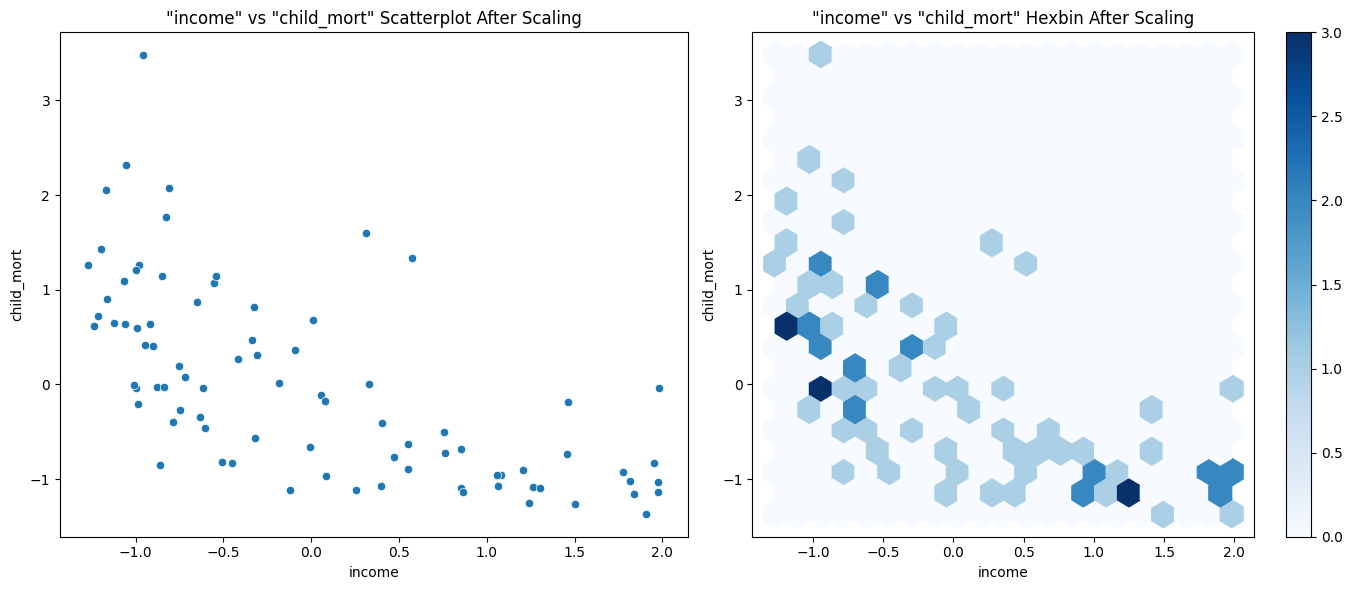

In [28]:
## Then, we need to check our scaled features’ correlation by visualizing them to ensure we do the scaling correctly.

fig = plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=scaled_dataset["income"], y=scaled_dataset["child_mort"])
plt.title('"income" vs "child_mort" Scatterplot After Scaling')
plt.tight_layout()
plt.subplot(1, 2, 2)
hb = plt.hexbin(x=scaled_dataset["income"],
                y=scaled_dataset["child_mort"], gridsize=20, cmap='Blues')
cb = plt.colorbar(hb)
plt.title('"income" vs "child_mort" Hexbin After Scaling')
plt.xlabel('income')
plt.ylabel('child_mort')
plt.tight_layout()
plt.savefig('bivariate_filter_scaled.png')
plt.show()


Determining the optimal number of clusters into which data can be clustered is a fundamental step for any unsupervised algorithm. The Elbow Method is one of the most widely used approaches for determining the optimal value of “K”.



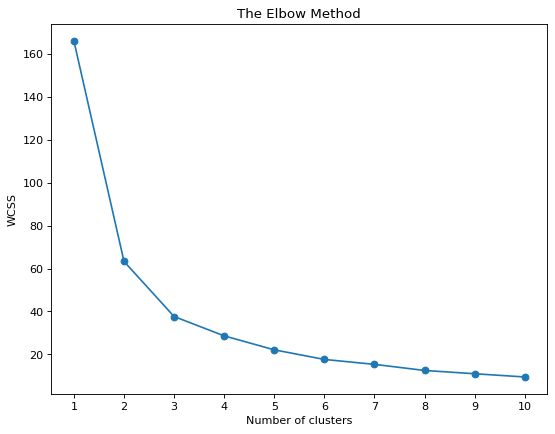

In [32]:
###Decide n-cluster using Elbow Method
wcss = []
k_range = range(1, 11)
for i in k_range:
    kmeans = skc.KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_dataset)
    wcss.append(kmeans.inertia_)
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
plt.plot(k_range, wcss, marker='o')
# for i, value in enumerate(wcss):
#     ax.text(i+1.05, value-0.005, round(value,1), fontsize=12, fontweight='bold')

plt.xticks(k_range)
# plt.grid()
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('num_clust.png')
plt.show()
